In [ ]:
!pip install pretty_midi textblob numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=0b7beb7d50ae0e4ecb39f6a6ef487fc8e5100633441c3a752e98d543fd57b39b
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
!pip install git+https://github.com/facebookresearch/audiocraft.git
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write
import numpy as np

  Cloning https://github.com/facebookresearch/audiocraft.git to /tmp/pip-req-build-5nofr0iv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/audiocraft.git /tmp/pip-req-build-5nofr0iv
  Resolved https://github.com/facebookresearch/audiocraft.git to commit f5931855b8e662462d0af8256d9c084ca04d6a94
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 102.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  

ModuleNotFoundError: No module named 'pretty_midi'

In [ ]:
!pip install pydub


# **VERSION 2 - WITH FEEDBACK, DURATION ADJUSTMENT, WITH POST-PROCESSING**

Welcome to the Enhanced Music Generator!
Loading Audiocraft MusicGen model...
Audiocraft MusicGen model loaded successfully.

Available moods:
  - happy: upbeat energetic pop with bright melodies
  - sad: slow emotional ballad with deep harmonies
  - relaxed: gentle and soothing ambient tones with soft pads
  - energetic: fast-paced electronic beats with dynamic rhythms
  - melancholy: deep piano melody with somber undertones
  - excited: high-energy dance beats with driving basslines
  - calm: soft instrumental music with mellow tones
  - romantic: smooth jazz with gentle saxophone melodies
  - adventurous: epic orchestral music with bold brass and percussion
  - nostalgic: lo-fi beats with warm and vintage vibes
  - mysterious: dark and ambient tones with eerie textures
  - joyful: uplifting and lively folk music with cheerful rhythms
  - angry: intense rock with heavy guitar riffs and aggressive drums
  - hopeful: inspiring orchestral music with rising crescendos
  - peaceful: tranq

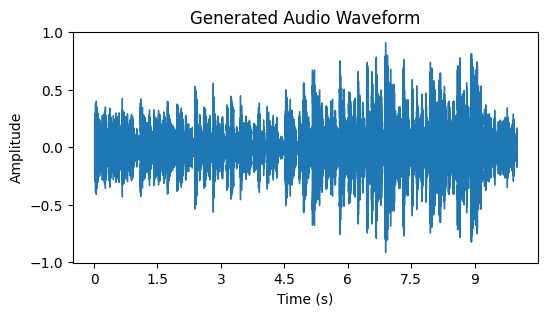


Feedback options:
  1. Describe a new mood or style (e.g., 'Make it jazzy', 'Switch to classical').
  2. Adjust duration (e.g., 'Change duration to 12').
  3. Provide specific feedback (e.g., 'Add more energy', 'Make it slower').
  4. Type 'end' to finalize and exit.
Refine the output (e.g., 'Make it faster', 'Change duration', or 'END' to end): more fun
Updating description based on feedback: 'more fun'

Current description: more fun, Duration: 10 seconds, Mood: more fun
Processed audio saved to processed_music.wav


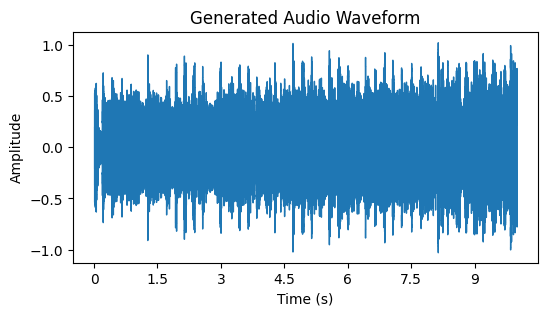


Feedback options:
  1. Describe a new mood or style (e.g., 'Make it jazzy', 'Switch to classical').
  2. Adjust duration (e.g., 'Change duration to 12').
  3. Provide specific feedback (e.g., 'Add more energy', 'Make it slower').
  4. Type 'end' to finalize and exit.
Refine the output (e.g., 'Make it faster', 'Change duration', or 'END' to end): end
Exiting feedback loop. Finalizing...

Mood Analysis for 'fun':
Expected Tempo Range: 120–160 BPM
Actual Tempo: [143.5546875] BPM
Tempo Alignment Score: 100%

Expected Spectral Centroid Range: 2500–4000 Hz
Actual Spectral Centroid: 2584.9057869252597 Hz
Spectral Centroid Alignment Score: 100%

Expected Spectral Bandwidth Range: 2000–4500 Hz
Actual Spectral Bandwidth: 2616.9819525892513 Hz
Spectral Bandwidth Alignment Score: 100%

Overall Alignment Score: 100.0%


In [ ]:
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from textblob import TextBlob
import IPython.display as ipd
import torch
import warnings
from pydub import AudioSegment
from pydub.effects import normalize, high_pass_filter, low_pass_filter

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="audiocraft")
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.utils.weight_norm")
import librosa
import numpy as np

# Define mood feature expectations
mood_features = {
    "happy": {
        "tempo": (120, 150),
        "spectral_centroid": (2000, 4000),  # Bright, high-energy
        "spectral_bandwidth": (2000, 5000), # Wide, dynamic
    },
    "sad": {
        "tempo": (50, 80),
        "spectral_centroid": (800, 1500),   # Warm, low-energy
        "spectral_bandwidth": (500, 1500), # Narrow and subdued
    },
    "relaxed": {
        "tempo": (60, 90),
        "spectral_centroid": (800, 1500),   # Smooth and calm
        "spectral_bandwidth": (500, 1500),  # Gentle and narrow
    },
    "energetic": {
        "tempo": (140, 180),
        "spectral_centroid": (2500, 4500),  # High-energy, driving
        "spectral_bandwidth": (3000, 6000), # Intense and dynamic
    },
    "melancholy": {
        "tempo": (50, 80),
        "spectral_centroid": (1000, 2000),  # Somber, introspective
        "spectral_bandwidth": (800, 2000),  # Low and narrow
    },
    "excited": {
        "tempo": (160, 200),
        "spectral_centroid": (3000, 5000),  # High-energy, intense
        "spectral_bandwidth": (4000, 7000), # Extreme dynamism
    },
    "calm": {
        "tempo": (60, 80),
        "spectral_centroid": (800, 1500),   # Mellow and tranquil
        "spectral_bandwidth": (500, 1500),  # Subtle and soft
    },
    "romantic": {
        "tempo": (70, 100),
        "spectral_centroid": (1200, 2500),  # Smooth and expressive
        "spectral_bandwidth": (1000, 3000), # Warm and rich
    },
    "adventurous": {
        "tempo": (100, 140),
        "spectral_centroid": (2000, 4000),  # Bold and dynamic
        "spectral_bandwidth": (2500, 4500), # Broad and impactful
    },
    "nostalgic": {
        "tempo": (60, 90),
        "spectral_centroid": (800, 2000),   # Warm and reflective
        "spectral_bandwidth": (1000, 3000), # Gentle and broad
    },
    "mysterious": {
        "tempo": (50, 80),
        "spectral_centroid": (1000, 2500),  # Eerie and suspenseful
        "spectral_bandwidth": (1000, 3000), # Balanced and intriguing
    },
    "joyful": {
        "tempo": (120, 150),
        "spectral_centroid": (2500, 4000),  # Bright and lively
        "spectral_bandwidth": (2000, 5000), # High-energy and dynamic
    },
    "angry": {
        "tempo": (130, 170),
        "spectral_centroid": (3000, 5000),  # Intense and aggressive
        "spectral_bandwidth": (3500, 6000), # Broad and sharp
    },
    "hopeful": {
        "tempo": (90, 120),
        "spectral_centroid": (2000, 3500),  # Rising and uplifting
        "spectral_bandwidth": (2000, 4000), # Open and expansive
    },
    "peaceful": {
        "tempo": (50, 70),
        "spectral_centroid": (800, 1500),   # Serene and tranquil
        "spectral_bandwidth": (500, 1500),  # Soft and narrow
    },
    "fun": {
        "tempo": (120, 160),
        "spectral_centroid": (2500, 4000),  # Playful and energetic
        "spectral_bandwidth": (2000, 4500), # Dynamic and lively
    },
    "dreamy": {
        "tempo": (70, 100),
        "spectral_centroid": (1000, 2500),  # Ethereal and spacious
        "spectral_bandwidth": (1000, 3000), # Balanced and smooth
    },
}


def calculate_proportional_score(actual, expected_range):
    """
    Calculate a proportional alignment score based on the distance from the expected range.

    Args:
        actual (float): The actual value (e.g., tempo or spectral centroid).
        expected_range (tuple): The expected range as (min, max).

    Returns:
        float: A score between 0 and 100 indicating alignment.
    """
    min_val, max_val = expected_range
    if actual < min_val:
        return max(0, (actual / min_val) * 100)
    elif actual > max_val:
        return max(0, ((2 * max_val - actual) / max_val) * 100)
    else:
        return 100

def analyze_alignment(output_file, mood, sampling_rate):
    """
    Analyze how well the generated music aligns with the expected features of a given mood.

    Args:
        output_file (str): Path to the generated music file.
        mood (str): The mood specified by the user (e.g., "happy", "relaxed").

    Returns:
        None: Prints the alignment report.
    """
    # Check if the mood exists in the feature map
    if mood not in mood_features:
        print(f"Error: Mood '{mood}' is not defined in the feature map.")
        return

    # Load audio file and extract features
    y, sr = librosa.load(output_file)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Get expected ranges for the mood
    expected_tempo = mood_features[mood]["tempo"]
    expected_centroid = mood_features[mood]["spectral_centroid"]
    expected_bandwidth = mood_features[mood]["spectral_bandwidth"]

    # Calculate proportional alignment scores
    tempo_score = calculate_proportional_score(tempo, expected_tempo)
    centroid_score = calculate_proportional_score(spectral_centroid, expected_centroid)
    bandwidth_score = calculate_proportional_score(spectral_bandwidth, expected_bandwidth)

    # Print report
    print(f"\nMood Analysis for '{mood}':")
    print(f"Expected Tempo Range: {expected_tempo[0]}–{expected_tempo[1]} BPM")
    print(f"Actual Tempo: {tempo} BPM")
    print(f"Tempo Alignment Score: {tempo_score}%")

    print(f"\nExpected Spectral Centroid Range: {expected_centroid[0]}–{expected_centroid[1]} Hz")
    print(f"Actual Spectral Centroid: {spectral_centroid} Hz")
    print(f"Spectral Centroid Alignment Score: {centroid_score}%")

    print(f"\nExpected Spectral Bandwidth Range: {expected_bandwidth[0]}–{expected_bandwidth[1]} Hz")
    print(f"Actual Spectral Bandwidth: {spectral_bandwidth} Hz")
    print(f"Spectral Bandwidth Alignment Score: {bandwidth_score}%")

    # Overall Alignment
    overall_score = (tempo_score + centroid_score + bandwidth_score) / 3
    print(f"\nOverall Alignment Score: {overall_score}%")

def play_processed_audio(processed_path):
    # Load the processed audio from disk
    y, sr = librosa.load(processed_path, sr=None)
    # Play the processed audio
    ipd.display(ipd.Audio(y, rate=sr))

def apply_post_processing(input_path, output_path, effect="reverb"):
    """
    Apply post-processing effects to audio.

    Args:
        input_path (str): Path to the input audio file.
        output_path (str): Path to save the processed audio file.
        effect (str): The effect to apply ('reverb', 'echo', 'normalize').
    """
    # Ensure the input file exists
    import os
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"Input file '{input_path}' does not exist for post-processing.")

    # Load the audio file
    audio = AudioSegment.from_file(input_path)

    # Apply the chosen effect
    if effect == "reverb":
        processed_audio = audio + AudioSegment.silent(duration=500)  # Simulate reverb with a tail
    elif effect == "echo":
        echo = audio[-500:]  # Take the last part to create an echo
        processed_audio = audio.overlay(echo, position=len(audio) - 500)
    elif effect == "normalize":
        processed_audio = normalize(audio)
    elif effect == "bass_boost":
        processed_audio = low_pass_filter(audio, cutoff=250)
    else:
        raise ValueError("Unknown effect: choose 'reverb', 'echo', or 'normalize'.")

    # Save the processed audio
    processed_audio.export(output_path, format="wav")
    print(f"Processed audio saved to {output_path}")


def load_audiocraft_model():
    print("Loading Audiocraft MusicGen model...")
    try:
        model = MusicGen.get_pretrained("medium")
        print("Audiocraft MusicGen model loaded successfully.")
        return model
    except Exception as e:
        print(f"Error loading Audiocraft MusicGen model: {e}")
        return None

def refine_description(description):
    analysis = TextBlob(description)
    return analysis.correct().lower()

def get_description_from_mood(mood):
    mood_to_description = {
        "happy": "upbeat energetic pop with bright melodies",
        "sad": "slow emotional ballad with deep harmonies",
        "relaxed": "gentle and soothing ambient tones with soft pads",
        "energetic": "fast-paced electronic beats with dynamic rhythms",
        "melancholy": "deep piano melody with somber undertones",
        "excited": "high-energy dance beats with driving basslines",
        "calm": "soft instrumental music with mellow tones",
        "romantic": "smooth jazz with gentle saxophone melodies",
        "adventurous": "epic orchestral music with bold brass and percussion",
        "nostalgic": "lo-fi beats with warm and vintage vibes",
        "mysterious": "dark and ambient tones with eerie textures",
        "joyful": "uplifting and lively folk music with cheerful rhythms",
        "angry": "intense rock with heavy guitar riffs and aggressive drums",
        "hopeful": "inspiring orchestral music with rising crescendos",
        "peaceful": "tranquil piano music with serene melodies",
        "fun": "playful and quirky tunes with upbeat rhythms",
        "dreamy": "ethereal ambient pads with flowing melodies",
    }
    return mood_to_description.get(mood.lower(), "neutral tones")

def get_effect_for_mood(mood):
    """Map moods to appropriate audio effects for post-processing."""
    mood_to_effect = {
        "happy": "normalize",
        "sad": "reverb",
        "relaxed": "reverb",
        "energetic": "normalize",
        "melancholy": "reverb",
        "excited": "echo",
        "calm": "reverb",
        "romantic": "reverb",
        "adventurous": "bass_boost",
        "nostalgic": "echo",
        "mysterious": "echo",
        "joyful": "normalize",
        "angry": "bass_boost",
        "hopeful": "normalize",
        "peaceful": "reverb",
        "fun": "bass_boost",
        "dreamy": "reverb",
    }
    return mood_to_effect.get(mood, "normalize")  # Default to "normalize"

def visualize_audio(audio, sample_rate):
    plt.figure(figsize=(6, 3))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title("Generated Audio Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

def play_audio(audio, sample_rate):
    """Play the generated audio."""
    audio_normalized = audio / np.max(np.abs(audio))  # Normalize audio for playback
    ipd.display(ipd.Audio(audio_normalized, rate=sample_rate))

def process_and_save_audio(input_audio, sample_rate, effect, output_path):
    """
    Process the audio and save it after applying post-processing effects.

    Args:
        input_audio (torch.Tensor): The generated audio tensor.
        sample_rate (int): The sample rate of the audio.
        effect (str): The post-processing effect to apply.
        output_path (str): Path to save the processed audio.
    """
    temp_input_path = "temp_generated_music"  # Remove the extension here

    # Ensure input audio is a tensor and floating point
    if not isinstance(input_audio, torch.Tensor):
        input_audio = torch.tensor(input_audio, dtype=torch.float32)

    # Save the input audio to a temporary file
    audio_write(temp_input_path, input_audio, sample_rate)  # `audio_write` appends `.wav`

    # Verify the temporary file exists
    temp_input_path += ".wav"  # Explicitly add the extension for further checks
    import os
    if not os.path.exists(temp_input_path):
        raise FileNotFoundError(f"Temporary file '{temp_input_path}' was not created.")

    # Apply the selected effect and save the processed audio
    apply_post_processing(temp_input_path, output_path, effect)



def generate_music_with_processing(model, description, duration, mood):
    """Generate music, apply mood-specific post-processing, and save it."""
    print(f"Generating music with description: '{description}'")
    model.set_generation_params(duration=duration)
    generated_audio = model.generate([description])[0].cpu()  # Ensure PyTorch tensor

    # Get the effect based on the mood
    effect = get_effect_for_mood(mood)

    # Apply post-processing and save the audio
    processed_output_path = "processed_music.wav"
    process_and_save_audio(generated_audio, model.sample_rate, effect, processed_output_path)
    print(f"Final processed audio saved to {processed_output_path}")


def feedback_loop(model, initial_description, initial_duration, initial_mood):
    """Iteratively refine MusicGen outputs based on user feedback."""
    description = initial_description
    duration = initial_duration
    mood = initial_mood
    cached_audio = None

    while True:
        print(f"\nCurrent description: {description}, Duration: {duration} seconds, Mood: {mood}")

        if cached_audio is None:
            # Generate initial audio
            model.set_generation_params(duration=duration)
            cached_audio = model.generate([description])[0].cpu()
        else:
            # Extend audio using contextual continuation
            additional_duration = duration - cached_audio.shape[-1] // model.sample_rate
            if additional_duration > 0:
                cached_audio = extend_audio_with_context(model, cached_audio, description, additional_duration, model.sample_rate)

        # Apply post-processing based on mood
        effect = get_effect_for_mood(mood)
        processed_output_path = "processed_music.wav"
        process_and_save_audio(cached_audio.numpy(), model.sample_rate, effect, processed_output_path)

        # Play and visualize the processed audio
        visualize_audio(cached_audio.numpy(), model.sample_rate)
        play_audio(cached_audio.numpy(), model.sample_rate)
        play_processed_audio(processed_output_path)

        # Display feedback options
        print("\nFeedback options:")
        print("  1. Describe a new mood or style (e.g., 'Make it jazzy', 'Switch to classical').")
        print("  2. Adjust duration (e.g., 'Change duration to 12').")
        print("  3. Provide specific feedback (e.g., 'Add more energy', 'Make it slower').")
        print("  4. Type 'end' to finalize and exit.")

        # Get user feedback
        feedback = input("Refine the output (e.g., 'Make it faster', 'Change duration', or 'END' to end): ").strip().lower()
        if feedback == "end":
            print("Exiting feedback loop. Finalizing...")
            analyze_alignment("processed_music.wav", initial_mood, model.sample_rate)

            break
        elif "duration" in feedback:
            try:
                new_duration = int(input("Enter new duration in seconds: ").strip())
                if new_duration > 0:
                    duration = new_duration
                    print(f"Duration updated to {duration} seconds.")
                else:
                    print("Invalid duration. Keeping the previous duration.")
            except ValueError:
                print("Invalid input. Keeping the previous duration.")
        else:
            # Update description and mood
            print(f"Updating description based on feedback: '{feedback}'")
            description = feedback
            mood = feedback.lower()  # Update mood if valid
            cached_audio = None  # Reset to regenerate with new description

def main():
    print("Welcome to the Enhanced Music Generator!")
    model = load_audiocraft_model()
    if not model:
        print("Failed to load Audiocraft model. Exiting.")
        return
    print("\nAvailable moods:")
    print("  - happy: upbeat energetic pop with bright melodies")
    print("  - sad: slow emotional ballad with deep harmonies")
    print("  - relaxed: gentle and soothing ambient tones with soft pads")
    print("  - energetic: fast-paced electronic beats with dynamic rhythms")
    print("  - melancholy: deep piano melody with somber undertones")
    print("  - excited: high-energy dance beats with driving basslines")
    print("  - calm: soft instrumental music with mellow tones")
    print("  - romantic: smooth jazz with gentle saxophone melodies")
    print("  - adventurous: epic orchestral music with bold brass and percussion")
    print("  - nostalgic: lo-fi beats with warm and vintage vibes")
    print("  - mysterious: dark and ambient tones with eerie textures")
    print("  - joyful: uplifting and lively folk music with cheerful rhythms")
    print("  - angry: intense rock with heavy guitar riffs and aggressive drums")
    print("  - hopeful: inspiring orchestral music with rising crescendos")
    print("  - peaceful: tranquil piano music with serene melodies")
    print("  - fun: playful and quirky tunes with upbeat rhythms")
    print("  - dreamy: ethereal ambient pads with flowing melodies")
    mood = input("Enter a mood (happy, sad, relaxed, energetic, melancholy): ").strip().lower()
    description = get_description_from_mood(mood)
    description = str(refine_description(description))
    print(f"Using refined description: {description}")
    try:
        duration = int(input("Enter duration for each music piece in seconds (default: 8): ").strip() or 8)
    except ValueError:
        duration = 8
    feedback_loop(model, description, duration, mood)

if __name__ == "__main__":
    main()